# Análise Exploratória de Dados

Neste notebook, foi feita a analise dos dados do dataset SDSS_DR18. 

**Objetivos:**
* Entender a distribuição das features em cada classe.
* Analisar a relação entre os intevalos das features e a classifcação.
* Identificar possíveis outliers e valores faltantes.
* Identificar os maximos e minimos das features para cada classe.

**Bibliotecas utilizadas:**
* **Pandas:** para manipulação de dados.
* **NumPy:** para operações numéricas.
* **Matplotlib:** para visualização de dados.
* **Seaborn:** para visualização de dados estatísticos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Entrada e separação dos dados 

In [2]:
sloan_table = pd.read_csv("Dados/SDSS_DR18.csv");
sloan_table.head(2000)

,objid,specobjid,ra,dec,u,g,r,i,z,run,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,756,...,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,756,...,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,756,...,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,756,...,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,756,...,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.240000e+18,5.260000e+17,130.852163,0.951573,18.59335,16.53429,15.48791,14.98926,14.61014,1239,...,19.14614,17.14951,16.84974,0.724870,0.939695,0.965371,0.928206,0.883583,0.096327,GALAXY
1996,1.240000e+18,4.290000e+18,131.078028,0.886101,18.64174,18.91801,19.41393,19.77970,20.10166,1239,...,18.92230,19.77762,20.08179,0.301126,0.345711,0.403563,0.471145,0.050000,0.000158,STAR
1997,1.240000e+18,1.410000e+19,131.098579,0.912649,19.15671,18.22034,17.92332,17.79087,17.73026,1239,...,18.22695,17.79704,17.74450,0.912668,0.297803,0.249946,0.739419,0.289048,0.000036,STAR
1998,1.240000e+18,1.410000e+19,131.145721,0.921603,18.01667,17.71583,17.63513,17.56084,17.53474,1239,...,17.73341,17.56756,17.54293,0.936394,0.304787,0.999905,0.501219,0.828048,0.439349,QSO


In [36]:
#Filtro de linhas com valores errados
sloan_table = sloan_table[sloan_table['u']>=0]
sloan_table = sloan_table[sloan_table['g']>=0]
sloan_table = sloan_table[sloan_table['r']>=0]
sloan_table = sloan_table[sloan_table['i']>=0]
sloan_table = sloan_table[sloan_table['z']>=0]

In [20]:
#Separa os dados em df exclusivos de cada classe para analizar o comportamento de cada classe em cada feature de interresse
sloan_galaxy = sloan_table[sloan_table['class'] == 'GALAXY']
sloan_qso = sloan_table[sloan_table['class'] == 'QSO']
sloan_star = sloan_table[sloan_table['class'] == 'STAR']


## Analise das medias das features para cada classe

In [21]:
#Analisa a media da classe estrela nas features:u,g,r,i,z
star_u_mean = sloan_star['u'].mean()
star_g_mean = sloan_star['g'].mean()
star_r_mean = sloan_star['r'].mean()
star_i_mean = sloan_star['i'].mean()
star_z_mean = sloan_star['z'].mean()
print(f'Média u para estrela: {star_u_mean}')
print(f'Média g para estrela: {star_g_mean}')
print(f'Média r para estrela: {star_r_mean}')
print(f'Média i para estrela: {star_i_mean}')
print(f'Média z para estrela: {star_z_mean}')

Média u para estrela: 18.35773696355188
Média g para estrela: 17.162173809191263
Média r para estrela: 16.769294888399454
Média i para estrela: 16.629707570572908
Média z para estrela: 16.57027015175526


In [22]:
#Analisa a media da classe galaxia nas features:u,g,r,i,z
galaxy_u_mean = sloan_galaxy['u'].mean()
galaxy_g_mean = sloan_galaxy['g'].mean()
galaxy_r_mean = sloan_galaxy['r'].mean()
galaxy_i_mean = sloan_galaxy['i'].mean()
galaxy_z_mean = sloan_galaxy['z'].mean()
print(f'Média u para galaxia: {galaxy_u_mean}')
print(f'Média g para galaxia: {galaxy_g_mean}')
print(f'Média r para galaxia: {galaxy_r_mean}')
print(f'Média i para galaxia: {galaxy_i_mean}')
print(f'Média z para galaxia: {galaxy_z_mean}')

Média u para galaxia: 18.77976150704037
Média g para galaxia: 17.327795776160183
Média r para galaxia: 16.634642859899504
Média i para galaxia: 16.26193991498061
Média z para galaxia: 16.011740031141933


In [23]:
#Analisa a media da classe quasar nas features:u,g,r,i,z
qso_u_mean = sloan_qso['u'].mean()
qso_g_mean = sloan_qso['g'].mean()
qso_r_mean = sloan_qso['r'].mean()
qso_i_mean = sloan_qso['i'].mean()
qso_z_mean = sloan_qso['z'].mean()
print(f'Média u para quasar: {qso_u_mean}')
print(f'Média g para quasar: {qso_g_mean}')
print(f'Média r para quasar: {qso_r_mean}')
print(f'Média i para quasar: {qso_i_mean}')
print(f'Média z para quasar: {qso_z_mean}')

Média u para quasar: 18.957066376978414
Média g para quasar: 18.679749809112714
Média r para quasar: 18.4932436
Média i para quasar: 18.357115560671463
Média z para quasar: 18.27170447769784


## Analise do extremo superior das feature para cada classe

In [24]:
#Analisa o valor mais alto da classe estrela nas features:u,g,r,i,z
star_u_max = sloan_star['u'].max()
star_g_max = sloan_star['g'].max()
star_r_max = sloan_star['r'].max()
star_i_max = sloan_star['i'].max()
star_z_max = sloan_star['z'].max()
print(f"valor mais alto u para estrela: {star_u_max}")
print(f"valor mais alto g para estrela: {star_g_max}")
print(f"valor mais alto r para estrela: {star_r_max}")
print(f"valor mais alto i para estrela: {star_i_max}")
print(f"valor mais alto z para estrela: {star_z_max}")

valor mais alto u para estrela: 19.59991
valor mais alto g para estrela: 19.97727
valor mais alto r para estrela: 31.69816
valor mais alto i para estrela: 30.98087
valor mais alto z para estrela: 28.6687


In [25]:
#Analisa o valor mais alto da classe galaxia nas features:u,g,r,i,z
galaxy_u_max = sloan_galaxy['u'].max()
galaxy_g_max = sloan_galaxy['g'].max()
galaxy_r_max = sloan_galaxy['r'].max()
galaxy_i_max = sloan_galaxy['i'].max()
galaxy_z_max = sloan_galaxy['z'].max()
print(f"valor mais alto u para galaxia: {galaxy_u_max}")
print(f"valor mais alto g para galaxia: {galaxy_g_max}")
print(f"valor mais alto r para galaxia: {galaxy_r_max}")
print(f"valor mais alto i para galaxia: {galaxy_i_max}")
print(f"valor mais alto z para galaxia: {galaxy_z_max}")

valor mais alto u para galaxia: 19.59999
valor mais alto g para galaxia: 19.97613
valor mais alto r para galaxia: 29.74405
valor mais alto i para galaxia: 25.08679
valor mais alto z para galaxia: 28.23451


In [26]:
#Analisa o valor mais alto da classe quasar nas features:u,g,r,i,z
qso_u_max = sloan_qso['u'].max()
qso_g_max = sloan_qso['g'].max()
qso_r_max = sloan_qso['r'].max()
qso_i_max = sloan_qso['i'].max()
qso_z_max = sloan_qso['z'].max()
print(f"valor mais alto u para quasar: {qso_u_max}")
print(f"valor mais alto g para quasar: {qso_g_max}")
print(f"valor mais alto r para quasar: {qso_r_max}")
print(f"valor mais alto i para quasar: {qso_i_max}")
print(f"valor mais alto z para quasar: {qso_z_max}")

valor mais alto u para quasar: 19.59993
valor mais alto g para quasar: 19.90741
valor mais alto r para quasar: 28.37412
valor mais alto i para quasar: 27.22786
valor mais alto z para quasar: 22.82692


## Analise do limite inferior das features para cada classe

In [27]:
#Analisa o valor mais baixo da classe estrela nas features:u,g,r,i,z
star_u_min = sloan_star['u'].min()
star_g_min = sloan_star['g'].min()
star_r_min = sloan_star['r'].min()
star_i_min = sloan_star['i'].min()
star_z_min = sloan_star['z'].min()
print(f"valor mais baixo u para estrela: {star_u_min}")
print(f"valor mais baixo g para estrela: {star_g_min}")
print(f"valor mais baixo r para estrela: {star_r_min}")
print(f"valor mais baixo i para estrela: {star_i_min}")
print(f"valor mais baixo z para estrela: {star_z_min}")

valor mais baixo u para estrela: 11.96091
valor mais baixo g para estrela: 11.69617
valor mais baixo r para estrela: 11.27709
valor mais baixo i para estrela: 11.08821
valor mais baixo z para estrela: 11.28273


In [28]:
#Analisa o valor mais baixo da classe galaxia nas features:u,g,r,i,z
galaxy_u_min = sloan_galaxy['u'].min()
galaxy_g_min = sloan_galaxy['g'].min()
galaxy_r_min = sloan_galaxy['r'].min()
galaxy_i_min = sloan_galaxy['i'].min()
galaxy_z_min = sloan_galaxy['z'].min()
print(f"valor mais baixo u para galaxia: {galaxy_u_min}")
print(f"valor mais baixo g para galaxia: {galaxy_g_min}")
print(f"valor mais baixo r para galaxia: {galaxy_r_min}")
print(f"valor mais baixo i para galaxia: {galaxy_i_min}")
print(f"valor mais baixo z para galaxia: {galaxy_z_min}")

valor mais baixo u para galaxia: 11.72647
valor mais baixo g para galaxia: 12.35722
valor mais baixo r para galaxia: 11.53597
valor mais baixo i para galaxia: 11.05139
valor mais baixo z para galaxia: 10.61626


In [20]:
#Analisa o valor mais baixo da classe quasar nas features:u,g,r,i,z
qso_u_min = sloan_qso['u'].min()
qso_g_min = sloan_qso['g'].min()
qso_r_min = sloan_qso['r'].min()
qso_i_min = sloan_qso['i'].min()
qso_z_min = sloan_qso['z'].min()
print(f"valor mais baixo u para quasar: {qso_u_min}")
print(f"valor mais baixo g para quasar: {qso_g_min}")
print(f"valor mais baixo r para quasar: {qso_r_min}")
print(f"valor mais baixo i para quasar: {qso_i_min}")
print(f"valor mais baixo z para quasar: {qso_z_min}")

valor mais baixo u para quasar: 13.79397
valor mais baixo g para quasar: 13.44129
valor mais baixo r para quasar: 12.75138
valor mais baixo i para quasar: 11.61099
valor mais baixo z para quasar: 11.63339


## Analise do desvio padrão das features em cada classe

In [29]:
#Analisa o desvio padrão da classe estrela nas features:u,g,r,i,z
star_features = sloan_star[['u', 'g', 'r', 'i', 'z']]
feature_star_desviantion = star_features.std()
print(feature_star_desviantion)

u    0.927164
g    1.005342
r    1.131770
i    1.196626
z    1.252235
dtype: float64


In [30]:
#Analisa o desvio padrão da classe galaxia nas features:u,g,r,i,z
galaxy_features = sloan_galaxy[['u', 'g', 'r', 'i', 'z']]
feature_galaxy_desviantion = galaxy_features.std()
print(feature_galaxy_desviantion)

u    0.733615
g    0.798713
r    0.882577
i    0.916226
z    0.975746
dtype: float64


In [31]:
#Analisa o desvio padrão da classe quasar nas features:u,g,r,i,z
qso_features = sloan_qso[['u', 'g', 'r', 'i', 'z']]
feature_qso_desviantion = qso_features.std()
print(feature_qso_desviantion)

u    0.580960
g    0.659334
r    0.757592
i    0.818249
z    0.854962
dtype: float64


## Mapa de calor das features

In [24]:
# Calculo da matrix de correlação
sloan_importance = sloan_table
sloan_importance["classificacao"] = sloan_importance["class"].replace(["STAR","QSO","GALAXY"],[0,1,2])
sloan_importance = sloan_importance.drop('class', axis=1)
correlation_matrix = sloan_importance.corr()
correlation_with_classification = correlation_matrix['classificacao']

C:\Users\Samsung\AppData\Local\Temp\ipykernel_13328\2102359767.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sloan_importance["classificacao"] = sloan_importance["class"].replace(["STAR","QSO","GALAXY"],[0,1,2])


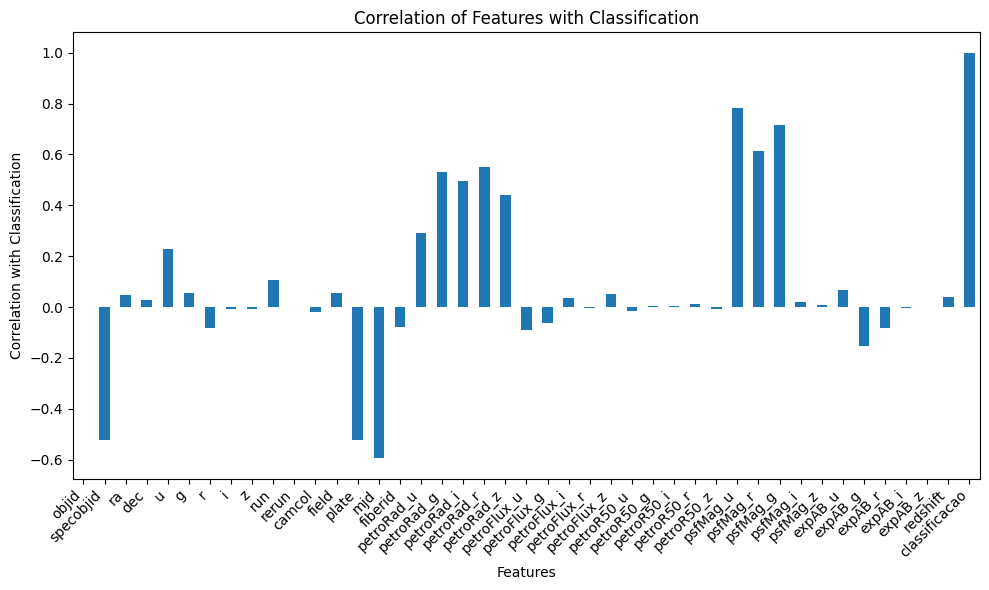

In [25]:
# Plot da matrix de correlação
plt.figure(figsize=(10, 6))
correlation_with_classification.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation with Classification')
plt.title('Correlation of Features with Classification')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


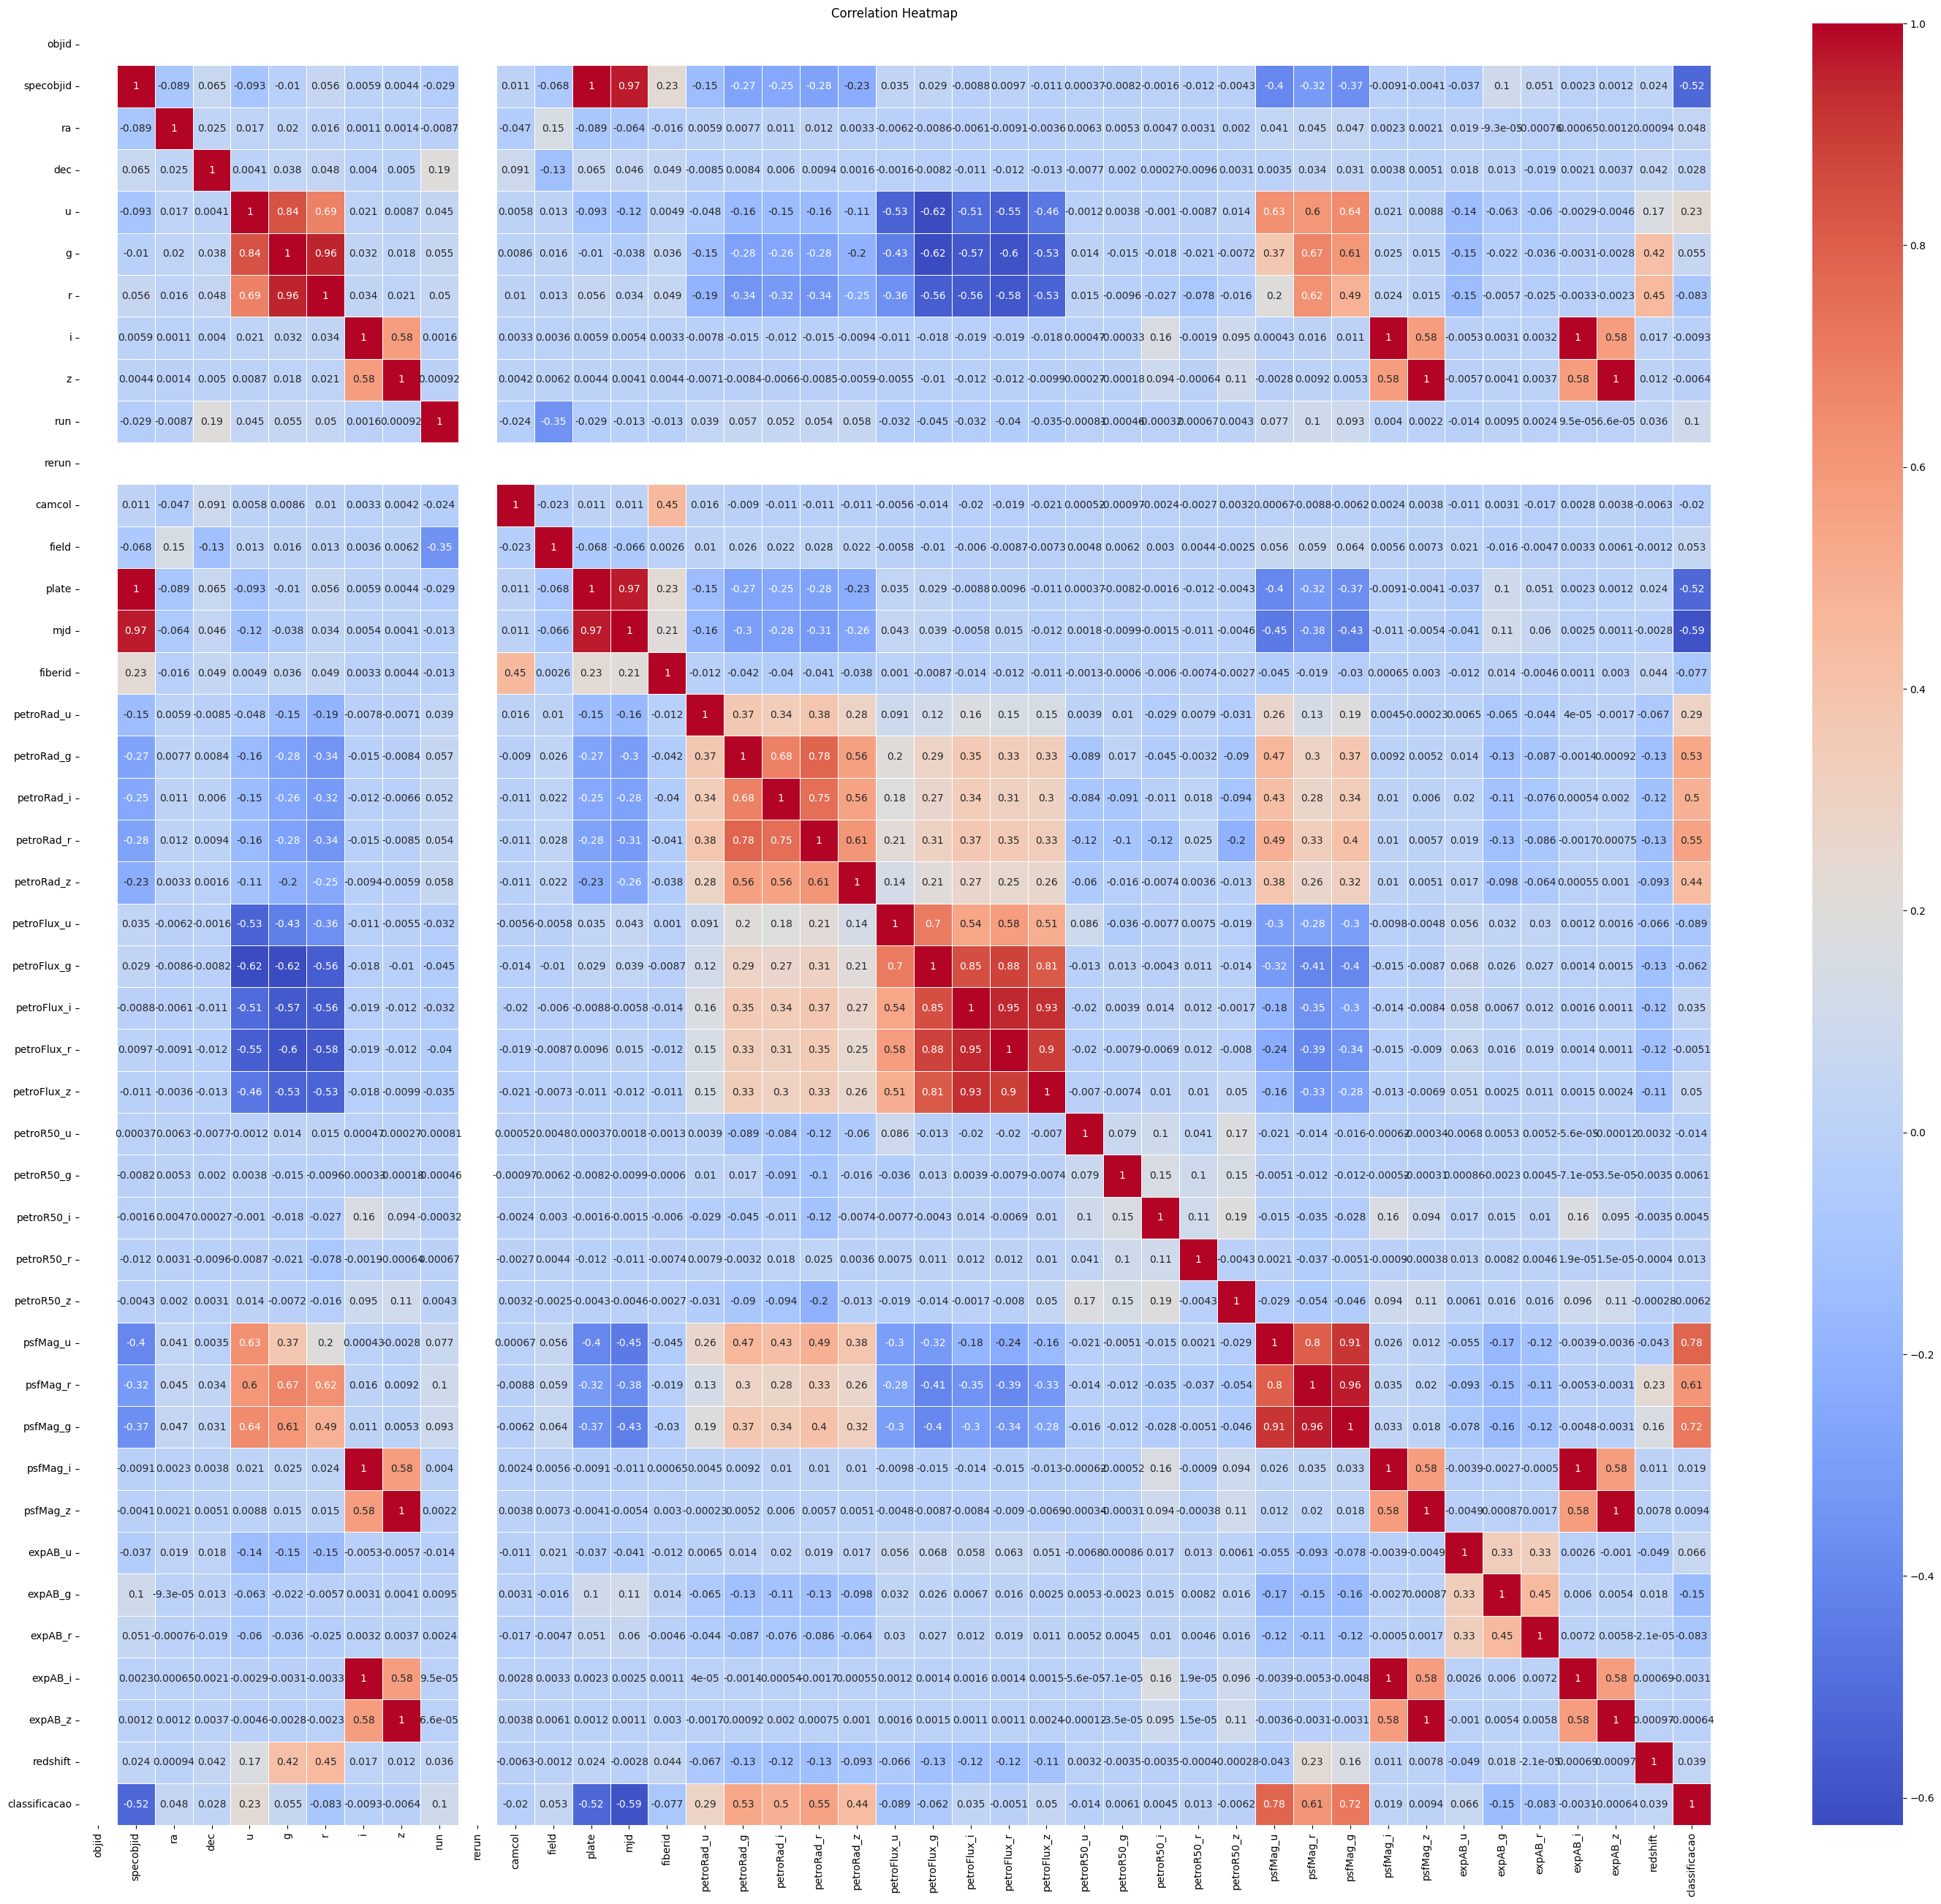

In [26]:
#Plot mapa de calor
plt.figure(figsize=(36, 32))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## Graficos estatisticos

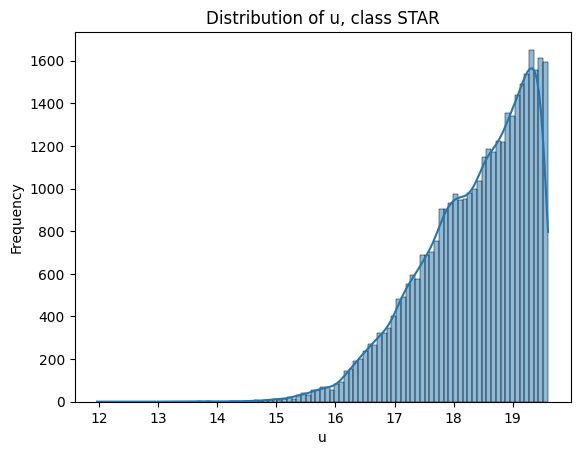

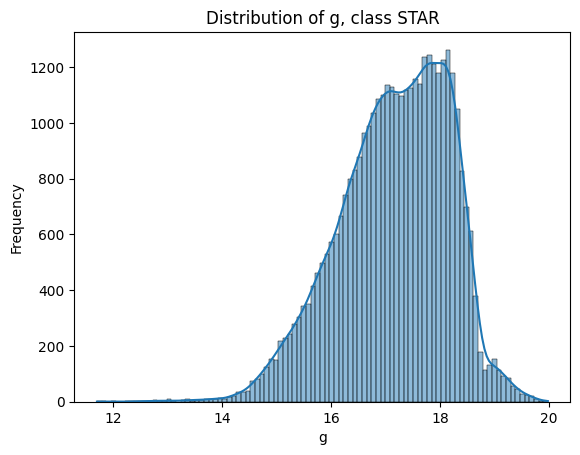

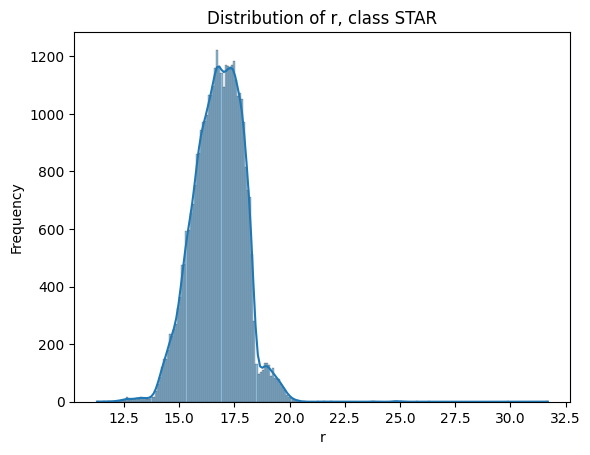

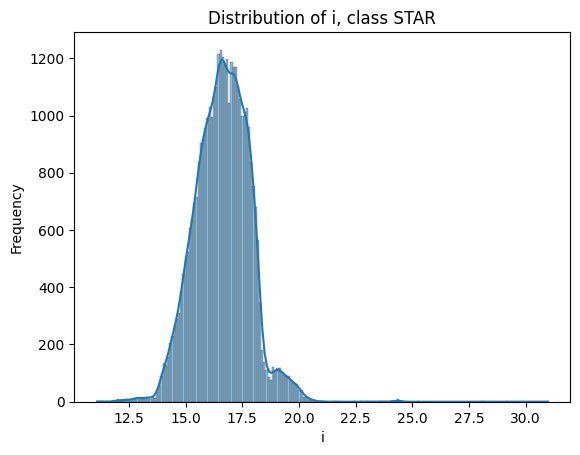

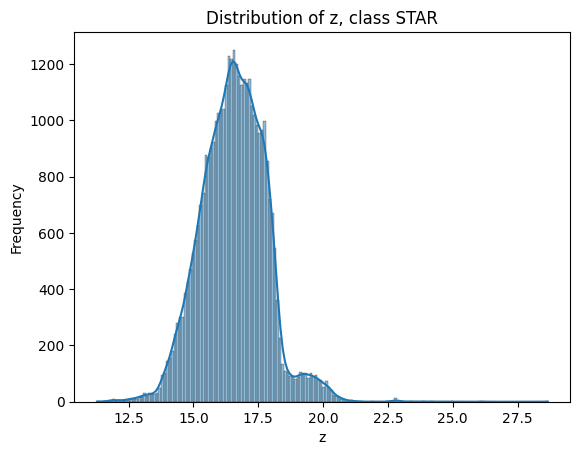

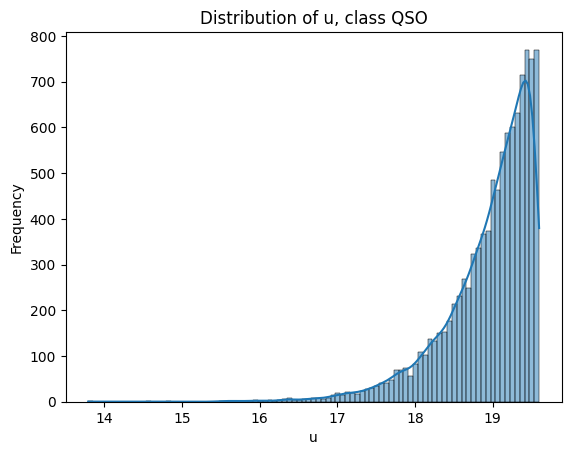

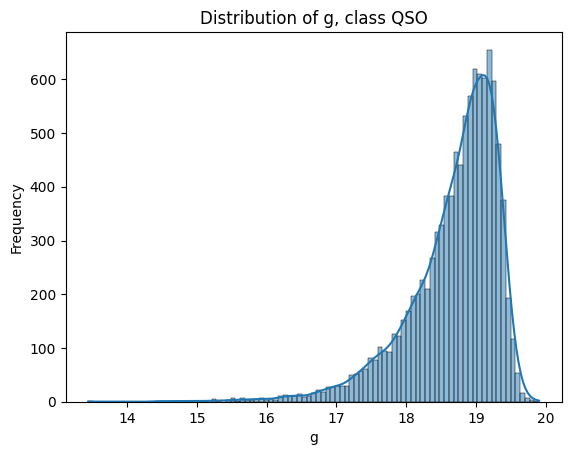

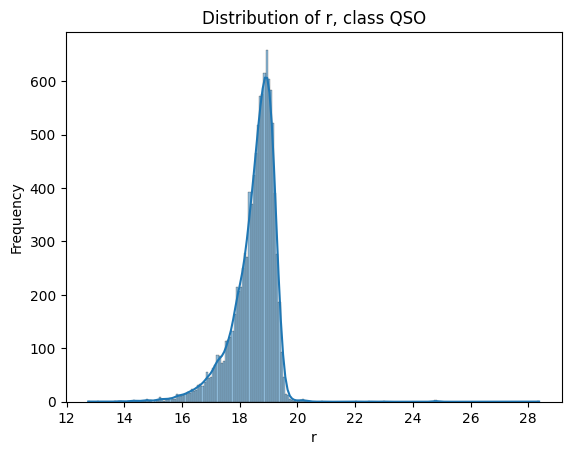

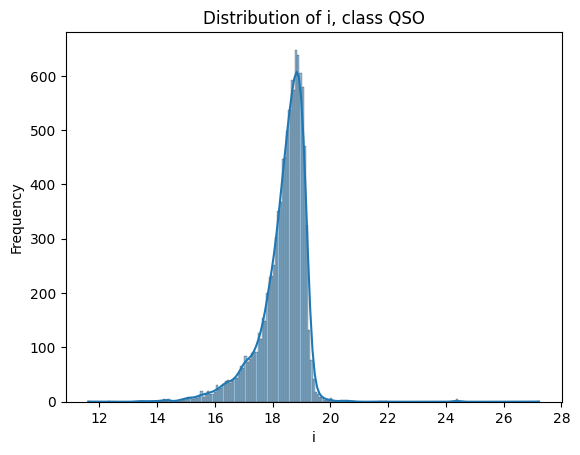

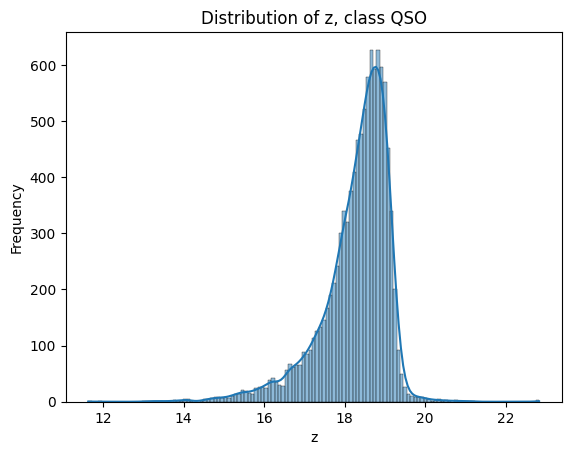

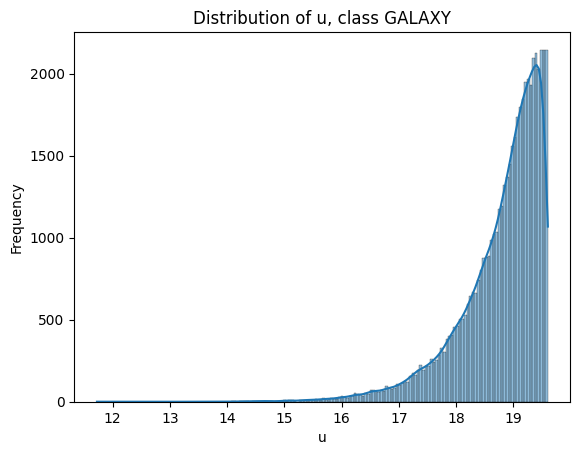

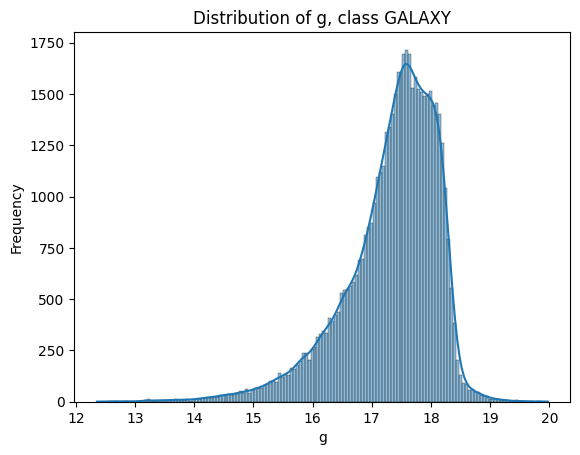

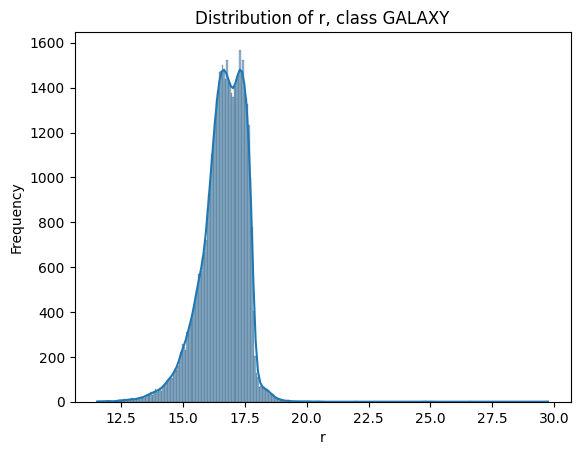

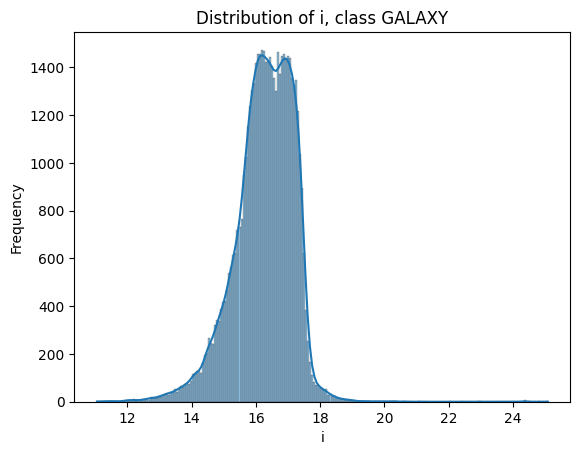

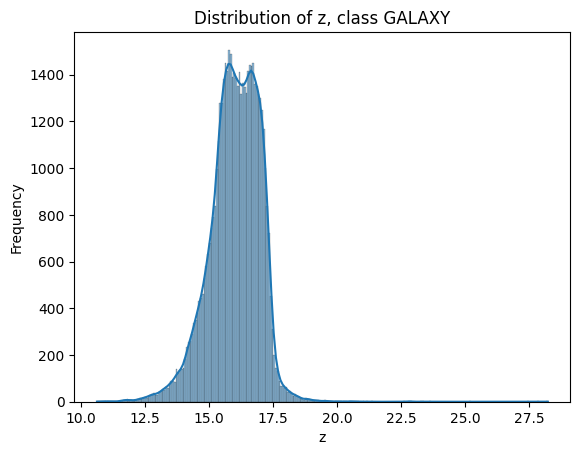

In [32]:
#Histograma de todas as classes para as features:u,g,r,i,z
#Histograms visualize the distribution of individual features, helping you understand their central tendencies, spread, and potential outliers
for typ in ['STAR', 'QSO', 'GALAXY']:
  for feature in ['u', 'g', 'r', 'i', 'z']:
      plt.figure()  # Create a new figure for each plot
      sloan_class = sloan_table[sloan_table['class'] == typ]
      sns.histplot(sloan_class[feature], kde=True)  # Plot histogram with kernel density estimate
      plt.xlabel(feature)
      plt.ylabel('Frequency')
      plt.title(f'Distribution of {feature}, class {typ}')
      plt.show()

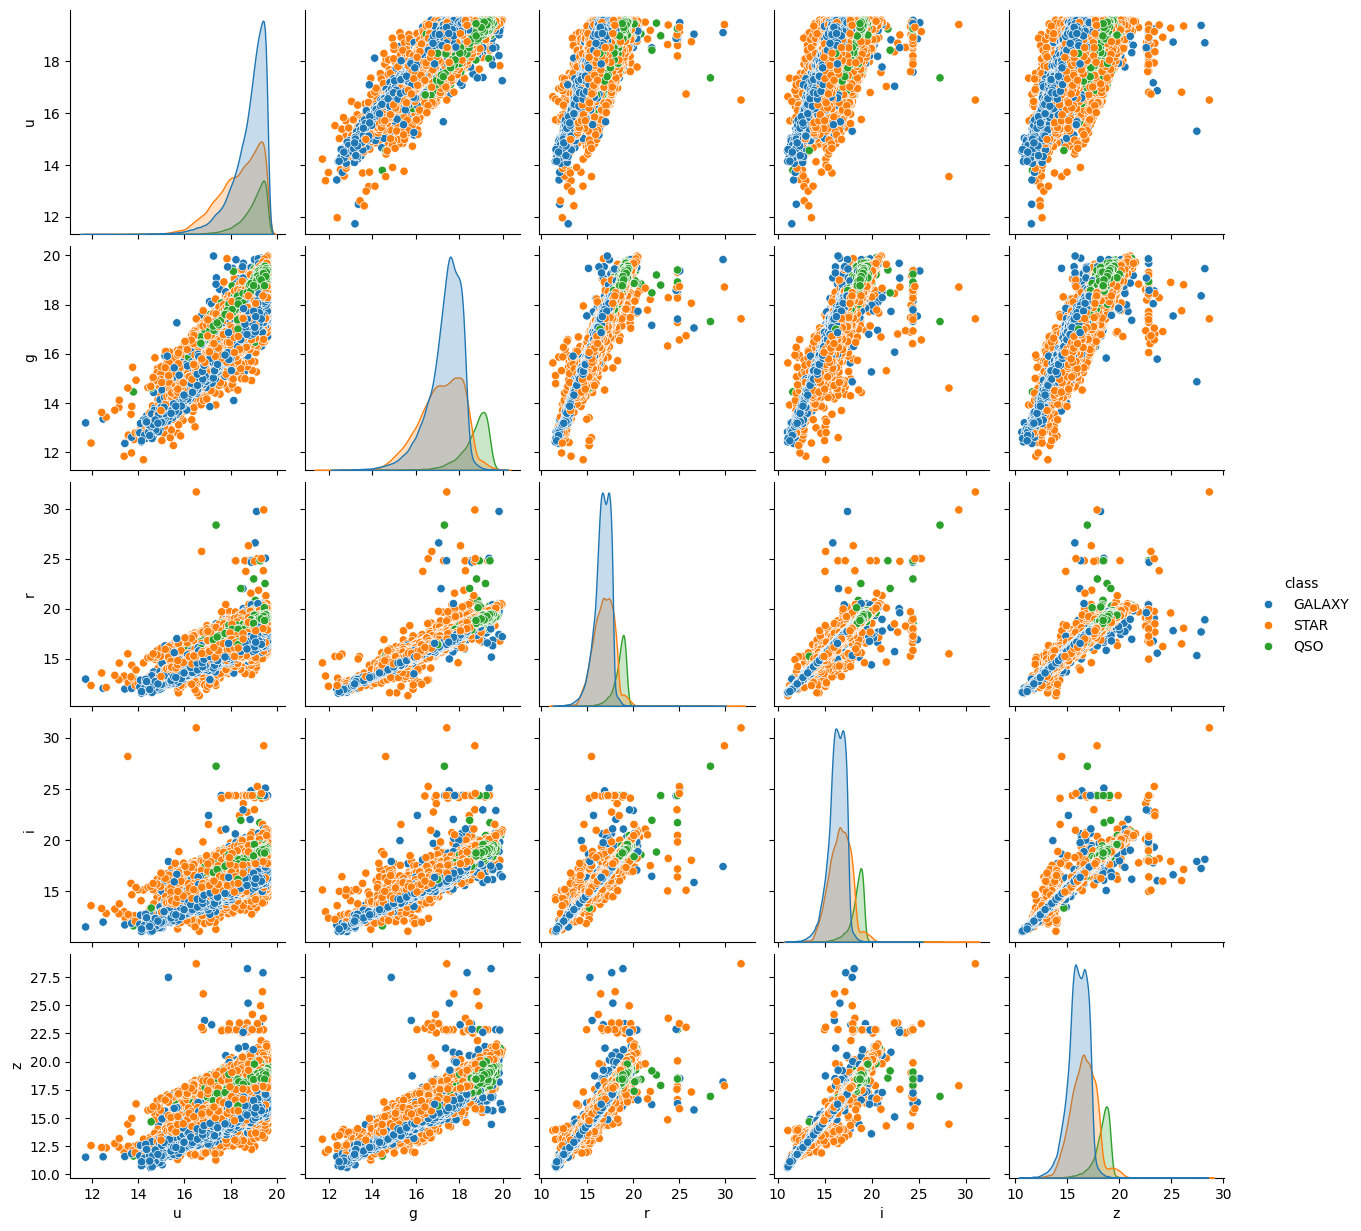

In [33]:
#Pair plots display scatter plots for all possible pairs of features, revealing
#potential correlations or patterns between them. The hue parameter color-codes
#points by class, aiding in identifying class-specific relationships
sns.pairplot(sloan_table, hue='class', vars=['u', 'g', 'r', 'i', 'z'])
plt.show()

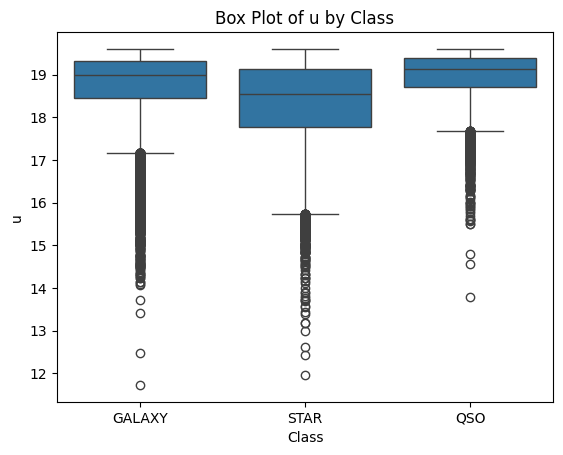

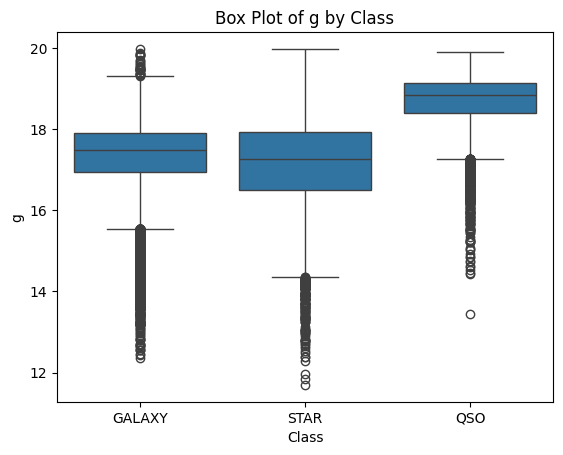

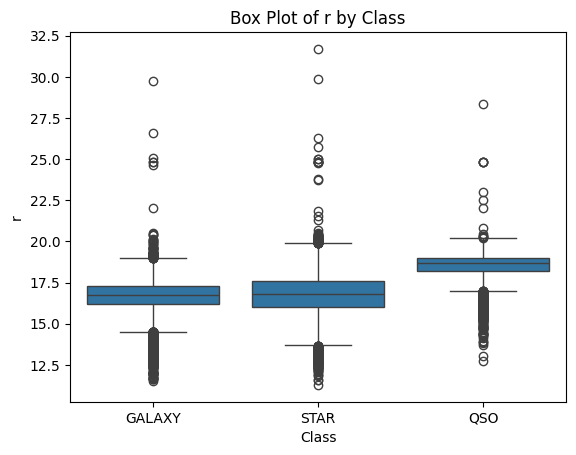

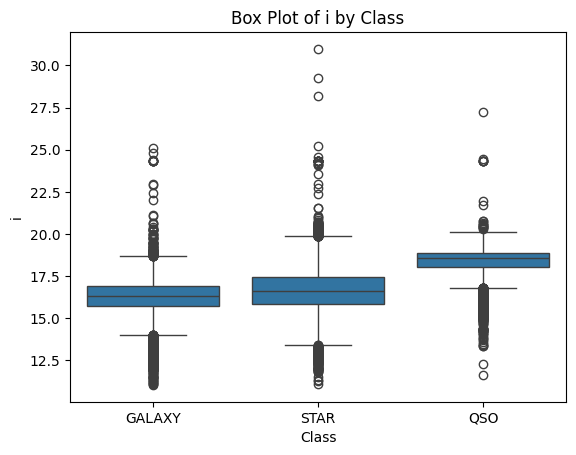

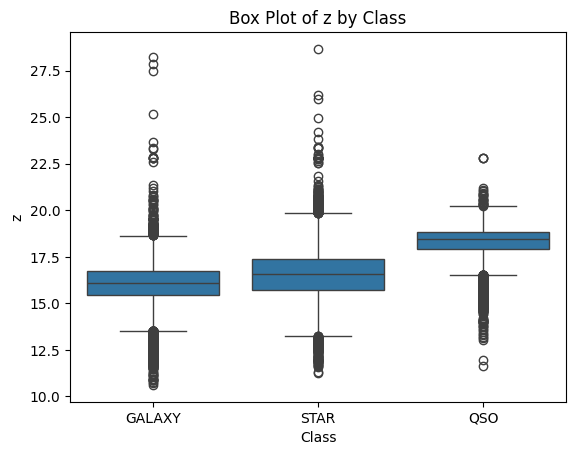

In [34]:
#Box plots summarize the distribution of each feature for each class,
#highlighting differences in medians, quartiles, and potential outliers across classes.
for feature in ['u', 'g', 'r', 'i', 'z']:
    plt.figure()
    sns.boxplot(x='class', y=feature, data=sloan_table)
    plt.xlabel('Class')
    plt.ylabel(feature)
    plt.title(f'Box Plot of {feature} by Class')
    plt.show()

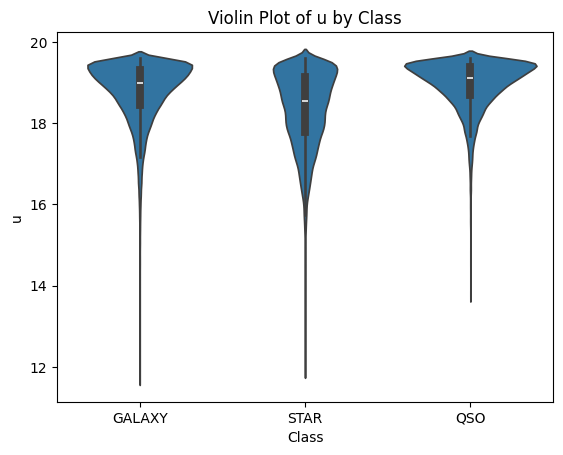

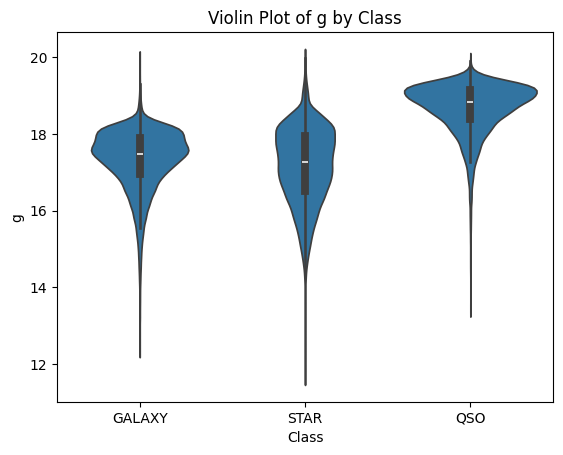

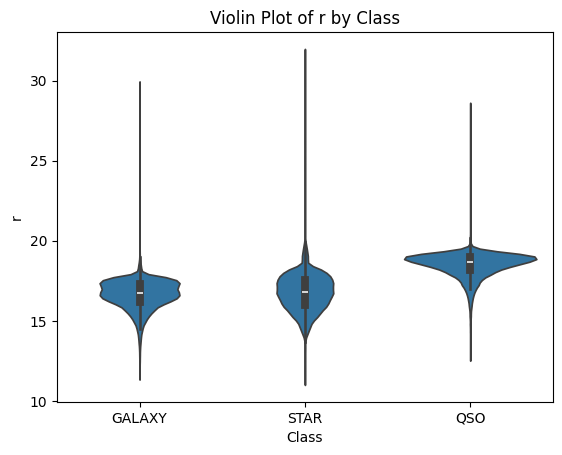

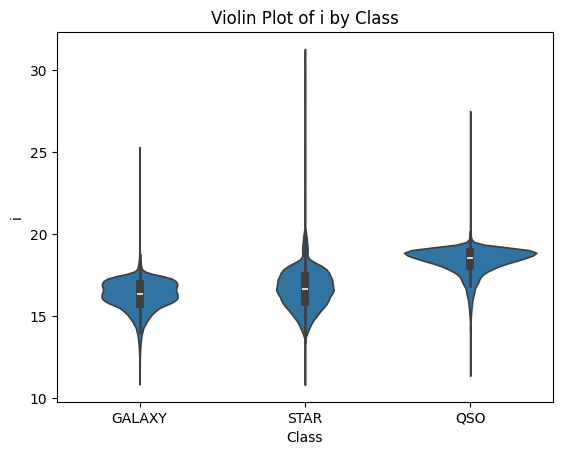

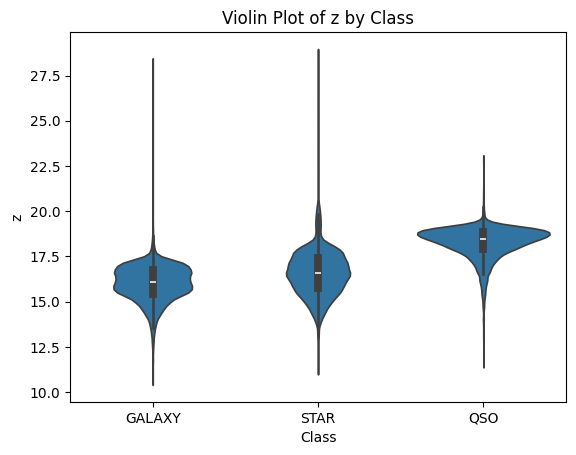

In [35]:
#Violin plots combine the benefits of box plots and kernel density estimates,
#providing a more detailed view of the distribution of each feature for each class.
for feature in ['u', 'g', 'r', 'i', 'z']:
    plt.figure()
    sns.violinplot(x='class', y=feature, data=sloan_table)
    plt.xlabel('Class')
    plt.ylabel(feature)
    plt.title(f'Violin Plot of {feature} by Class')
    plt.show()

## Teste de suavisação do desvio padrão

In [15]:
n = 10
sloan_qso['z'].nsmallest(n)

387      11.63339
58905    11.96270
75951    13.04113
57449    13.12031
86931    13.19373
89162    13.29420
55748    13.33960
62227    13.44597
46290    13.57818
67806    13.62587
Name: z, dtype: float64

In [16]:
n = 10
sloan_qso['z'].nlargest(n)

10137    22.82692
45105    22.82691
9611     22.82689
30502    21.19363
36701    21.08762
36315    21.04389
7874     20.90633
1887     20.88208
78102    20.86319
59670    20.80531
Name: z, dtype: float64

In [17]:
n = 10
sloan_qso['i'].nsmallest(n)

387      11.61099
58905    12.31995
75951    13.35497
75353    13.35676
86931    13.39542
57449    13.47452
89162    13.58366
55748    13.69549
62227    13.79561
67806    13.83652
Name: i, dtype: float64

In [18]:
n = 10
sloan_qso['i'].nlargest(n)

27795    27.22786
9444     24.42557
45105    24.36182
58099    24.36181
29053    24.36180
91854    24.36178
65931    24.35686
87235    21.93948
52308    21.70328
30502    20.79523
Name: i, dtype: float64

In [9]:
n = 10
sloan_star['z'].nsmallest(n)

60632   -9999.00000
1477       11.28273
1637       11.32714
19820      11.58986
1489       11.64674
1487       11.65409
5547       11.70038
71220      11.72288
20271      11.74678
1635       11.81991
Name: z, dtype: float64

In [10]:
n = 10
sloan_star['z'].nlargest(n)

53083    28.66870
22195    26.19352
91474    26.00334
96116    24.94653
91738    24.18352
15074    23.84022
46084    23.42582
29767    23.42335
81682    23.36497
37454    23.36162
Name: z, dtype: float64

In [11]:
n = 10
sloan_galaxy['z'].nsmallest(n)

64000   -9999.00000
67344   -9999.00000
2329       10.61626
86618      10.69751
69687      10.77748
10325      10.85940
20688      10.87456
22211      10.87663
67541      10.89738
224        10.91688
Name: z, dtype: float64

In [12]:
n = 10
sloan_galaxy['i'].nsmallest(n)

64000   -9999.00000
2329       11.05139
69687      11.07771
86618      11.11324
22211      11.18628
20688      11.24638
224        11.24778
93749      11.30489
67541      11.31937
46101      11.36309
Name: i, dtype: float64

In [13]:
n = 10
sloan_galaxy['z'].nlargest(n)

21847    28.23451
53245    27.87514
76933    27.46438
76751    25.18069
49875    23.64912
670      23.35737
34106    23.26494
56267    22.87016
9994     22.83306
7974     22.82691
Name: z, dtype: float64

In [14]:
n = 10
sloan_galaxy['i'].nlargest(n)

15632    25.08679
60010    24.81775
7141     24.37613
33118    24.36185
88010    24.36185
7974     24.36181
19223    24.36181
51888    24.36066
56267    24.33417
95104    22.95740
Name: i, dtype: float64